In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2

In [9]:
df = pd.read_csv(r"C:\Users\gouri\OneDrive\Desktop\AI_Anomaly_detection_system\Training and Testing Sets\UNSW_NB15_training-set.csv")

In [10]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [11]:
df.tail()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1
175340,175341,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,16,30,0,0,0,30,30,0,Generic,1


In [12]:
print(f"Shape of dataset[rows, columns]: {df.shape}")

Shape of dataset[rows, columns]: (175341, 45)


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,175341.0,8.767100e+04,5.061673e+04,1.0,43836.000000,87671.000000,1.315060e+05,1.753410e+05
dur,175341.0,1.359389e+00,6.480249e+00,0.0,0.000008,0.001582,6.680690e-01,5.999999e+01
spkts,175341.0,2.029866e+01,1.368876e+02,1.0,2.000000,2.000000,1.200000e+01,9.616000e+03
dpkts,175341.0,1.896959e+01,1.102583e+02,0.0,0.000000,2.000000,1.000000e+01,1.097400e+04
sbytes,175341.0,8.844844e+03,1.747656e+05,28.0,114.000000,430.000000,1.418000e+03,1.296523e+07
dbytes,175341.0,1.492892e+04,1.436542e+05,0.0,0.000000,164.000000,1.102000e+03,1.465555e+07
rate,175341.0,9.540619e+04,1.654010e+05,0.0,32.786140,3225.806520,1.250000e+05,1.000000e+06
sttl,175341.0,1.795470e+02,1.029400e+02,0.0,62.000000,254.000000,2.540000e+02,2.550000e+02
dttl,175341.0,7.960957e+01,1.105069e+02,0.0,0.000000,29.000000,2.520000e+02,2.540000e+02
sload,175341.0,7.345403e+07,1.883574e+08,0.0,13053.338870,879674.750000,8.888889e+07,5.988000e+09


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [15]:
is_null = df.isnull().sum()
print(f"Missing values count per column:\n {is_null}")

is_duplicated = df.duplicated().sum()
print(f"Duplicated values count in each row: {is_duplicated}")

Missing values count per column:
 id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0


In [16]:
print(f"Data types of each column: \n {df.dtypes}")

Data types of each column: 
 id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm    

In [17]:
for i in df.columns:
    if df[i].dtype == "object":
        print(f"Column '{i}' is of type object (categorical/text).")

Column 'proto' is of type object (categorical/text).
Column 'service' is of type object (categorical/text).
Column 'state' is of type object (categorical/text).
Column 'attack_cat' is of type object (categorical/text).


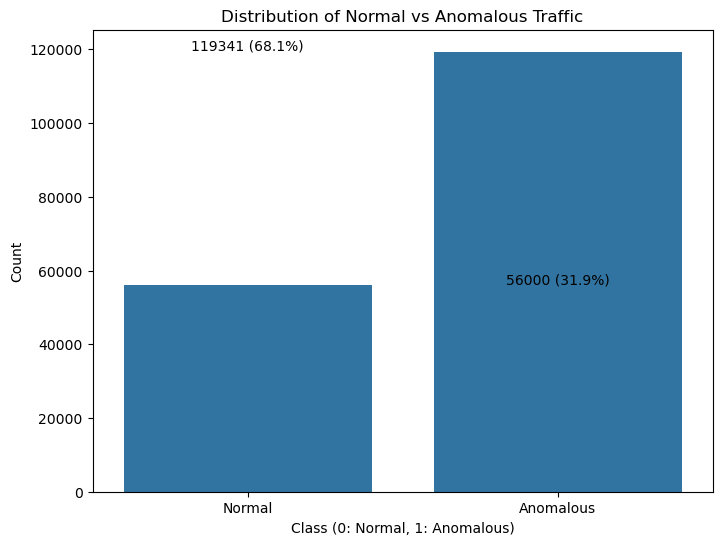

In [18]:
plt.figure(figsize=(8, 6))
class_counts = df['label'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Normal vs Anomalous Traffic')
plt.xlabel('Class (0: Normal, 1: Anomalous)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Anomalous'])
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 500, f"{v} ({v/df.shape[0]*100:.1f}%)", ha='center')
plt.show()

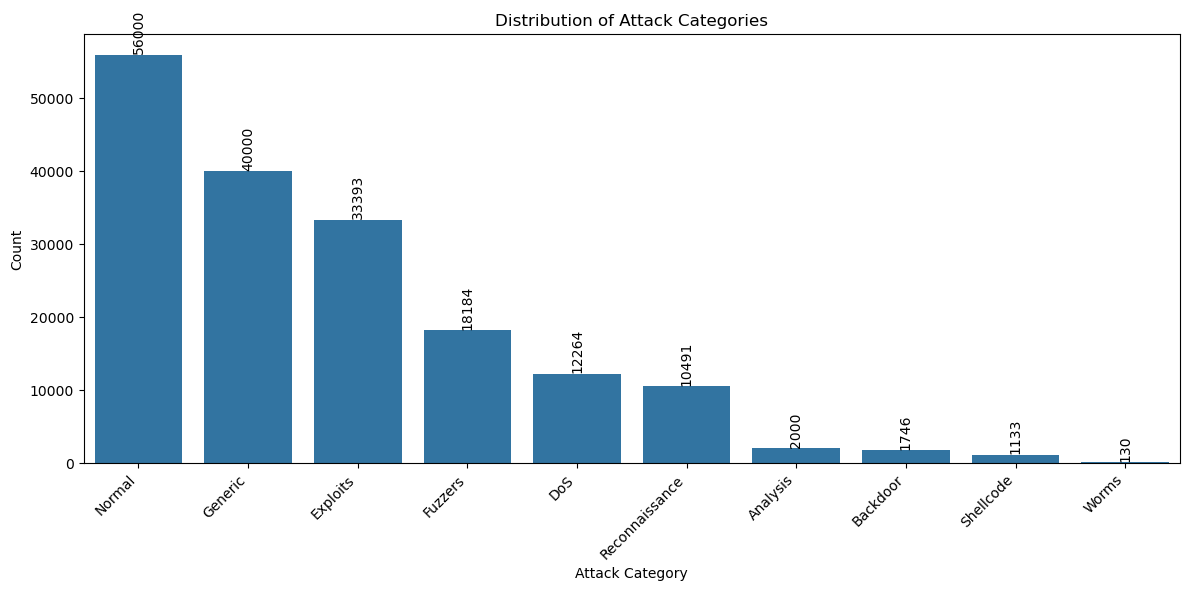

In [19]:
plt.figure(figsize=(12, 6))
attack_counts = df['attack_cat'].value_counts()
sns.barplot(x=attack_counts.index, y=attack_counts.values)
plt.title('Distribution of Attack Categories')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(attack_counts.values):
    plt.text(i, v + 500, f"{v}", ha='center', rotation=90)
plt.tight_layout()
plt.show()


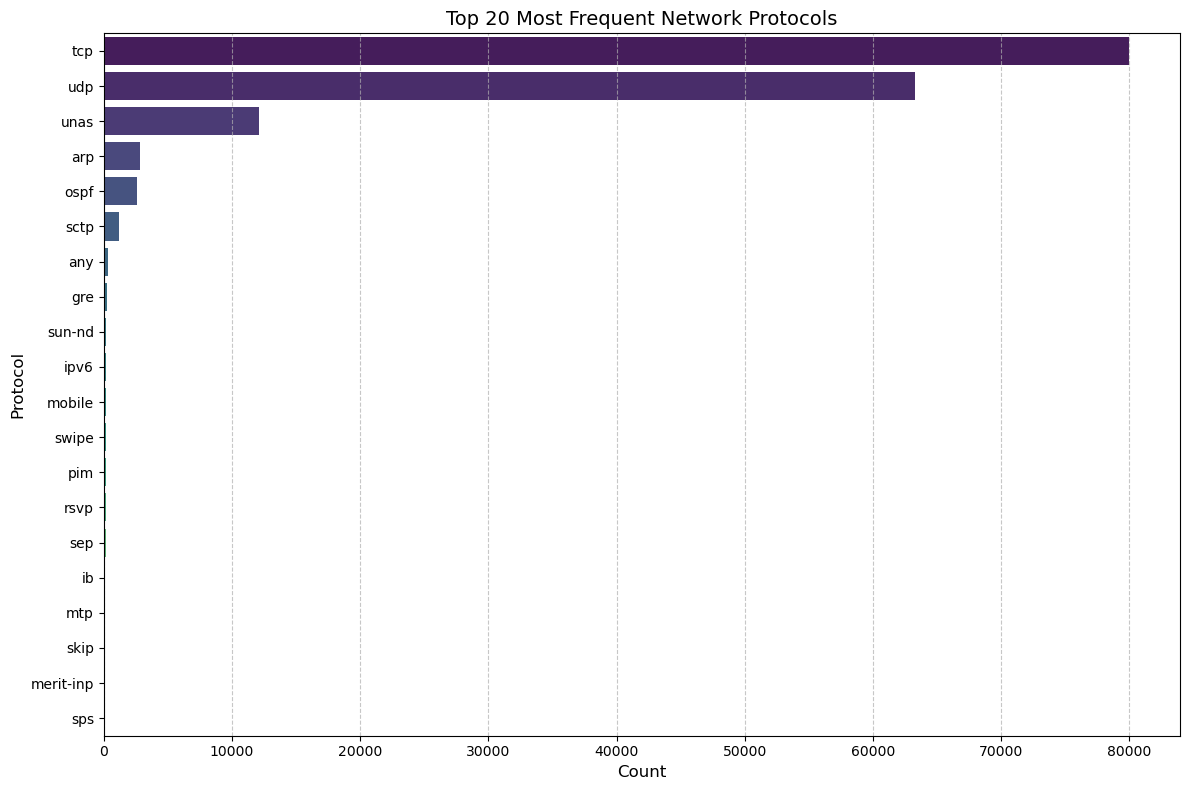

In [20]:
# Sort protocols by count
proto_counts = df['proto'].value_counts()

# Limit to top 20 protocols (adjust as needed)
top_n = 20  
proto_counts = proto_counts[:top_n]

plt.figure(figsize=(12, 8))  
sns.barplot(
    y=proto_counts.index, 
    x=proto_counts.values, 
    hue=proto_counts.index,  
    palette="viridis", 
    legend=False  
)

plt.title(f'Top {top_n} Most Frequent Network Protocols', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Protocol', fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add subtle grid lines
plt.tight_layout()

plt.show()

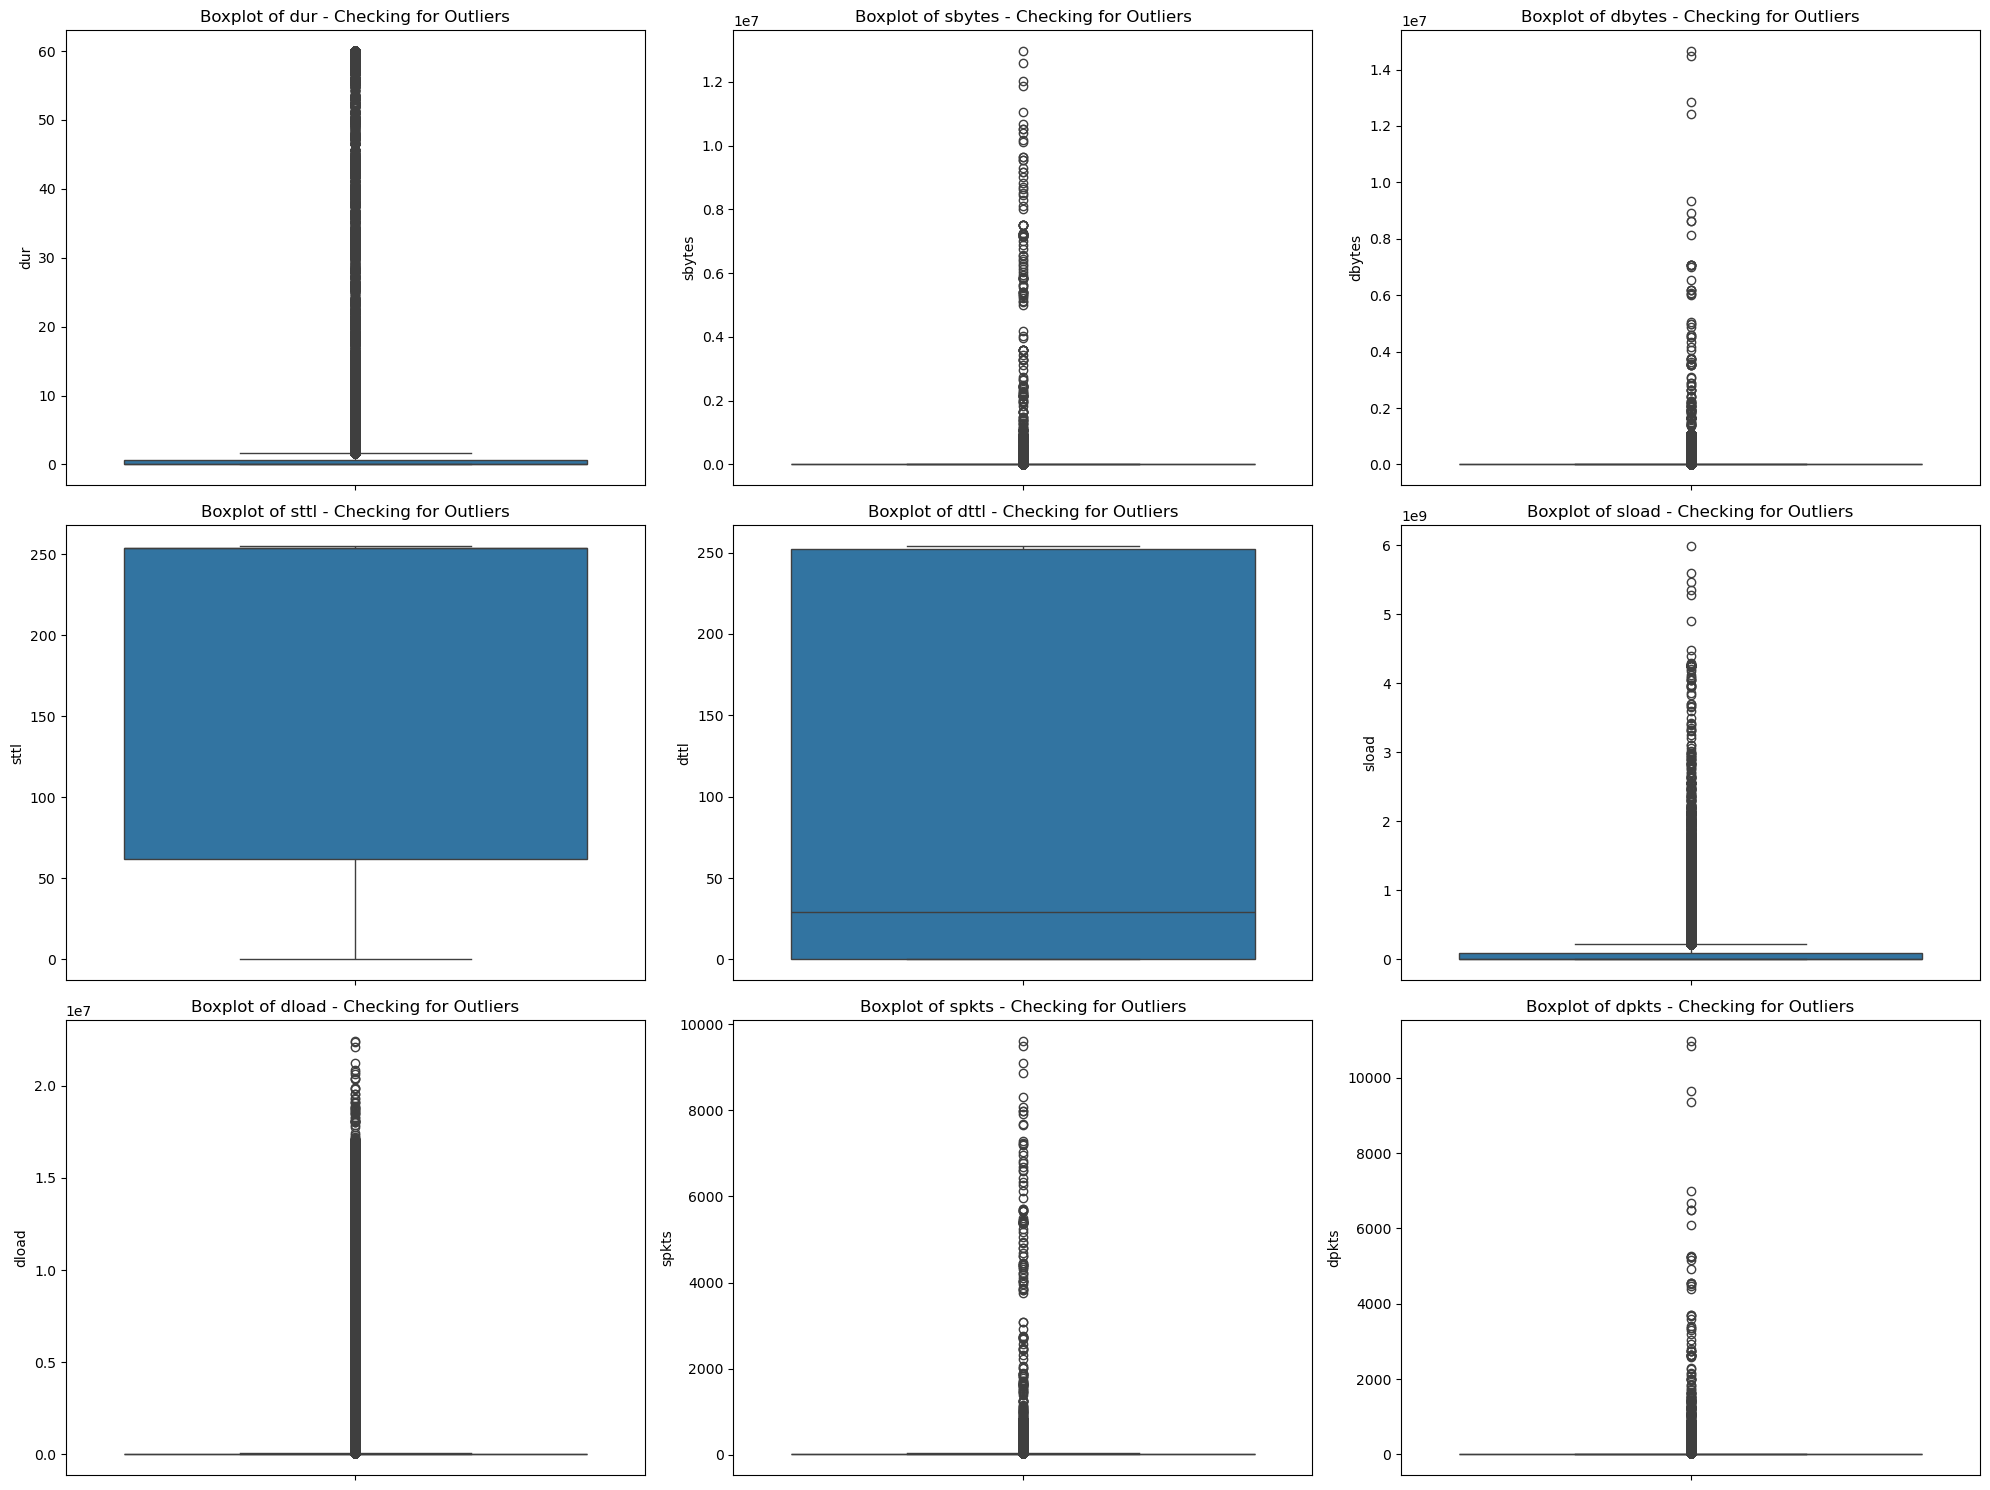

In [21]:

key_features = ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sload', 'dload', 'spkts', 'dpkts']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(key_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=feature, data=df)
    plt.title(f'Boxplot of {feature} - Checking for Outliers')
    plt.tight_layout()
plt.show()

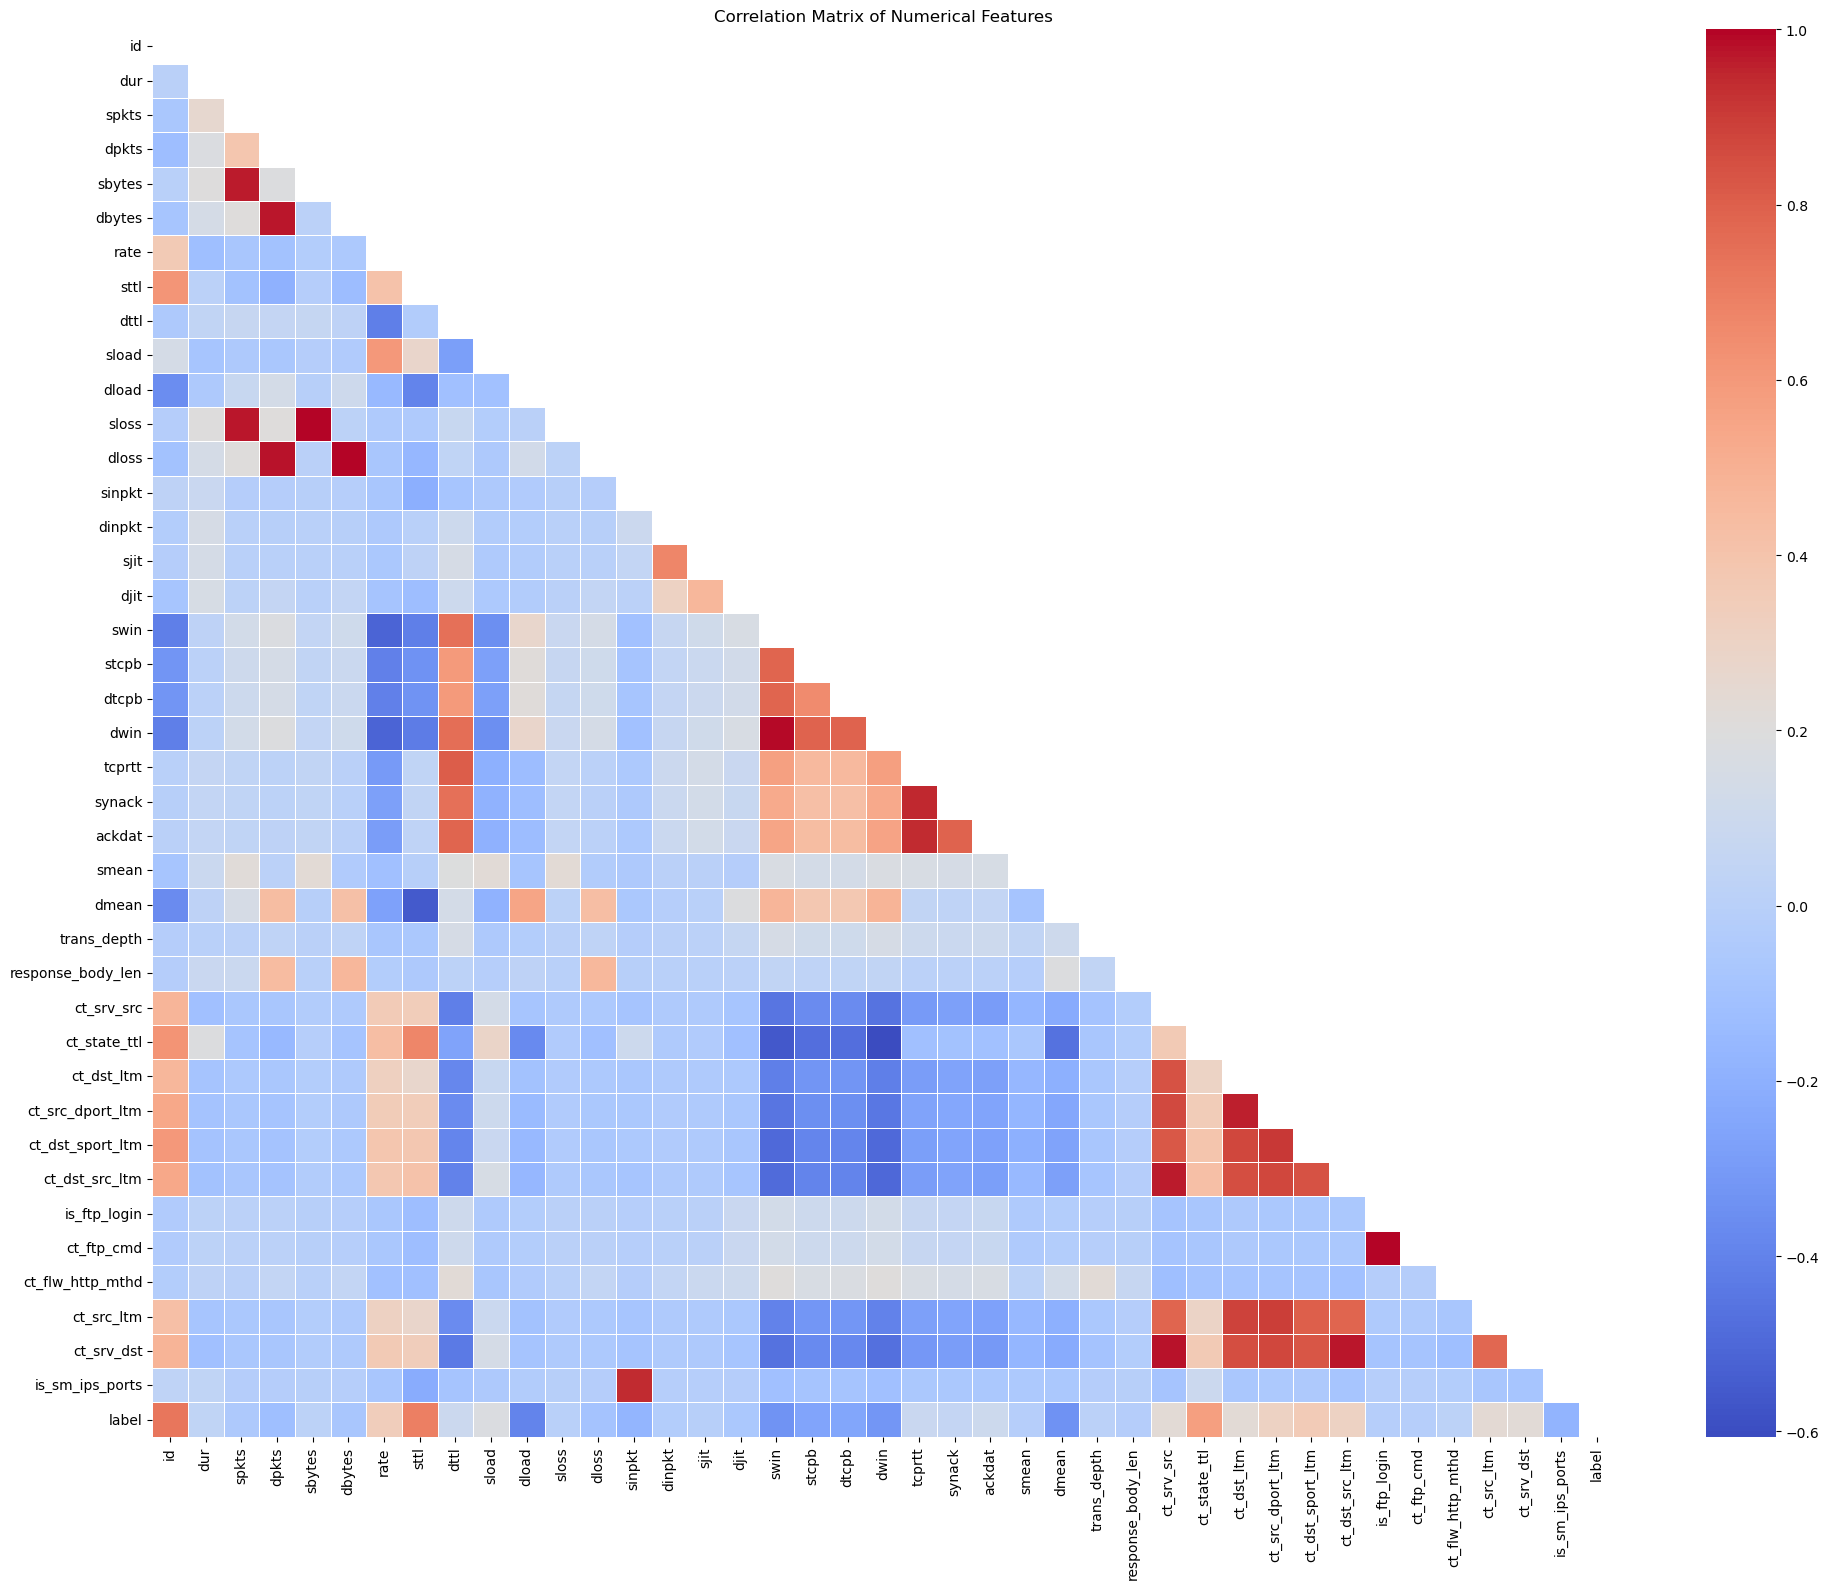

In [22]:
plt.figure(figsize=(20, 16))
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numerical_cols].corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=False, mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [23]:
categorical_columns = ['proto', 'service', 'state', 'attack_cat']  # Make sure 'service' is correct (not 'services')
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print("Shape after encoding categorical features:", df_encoded.shape)
df_encoded.head()

Shape after encoding categorical features: (175341, 202)


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,state_no,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
0,1,0.121478,6,4,258,172,74.087490,252,254,14158.942380,...,False,False,False,False,False,False,True,False,False,False
1,2,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,...,False,False,False,False,False,False,True,False,False,False
2,3,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,...,False,False,False,False,False,False,True,False,False,False
3,4,1.681642,12,12,628,770,13.677108,62,252,2740.178955,...,False,False,False,False,False,False,True,False,False,False
4,5,0.449454,10,6,534,268,33.373826,254,252,8561.499023,...,False,False,False,False,False,False,True,False,False,False


In [24]:
df_encoded.dtypes

id                             int64
dur                          float64
spkts                          int64
dpkts                          int64
sbytes                         int64
                              ...   
attack_cat_Generic              bool
attack_cat_Normal               bool
attack_cat_Reconnaissance       bool
attack_cat_Shellcode            bool
attack_cat_Worms                bool
Length: 202, dtype: object

In [25]:
if df_encoded.isnull().sum().sum() > 0:
    # Fill missing numerical values with median
    numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        if df_encoded[col].isnull().sum() > 0:
            df_encoded[col].fillna(df_encoded[col].median(), inplace=True)
            print(f"Filled missing values in {col} with median.")
    
    # Check if we still have missing values
    is_null_after = df_encoded.isnull().sum()
    print(f"Missing values after handling:\n {is_null_after}")
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [26]:
if is_duplicated > 0:
    df_encoded = df_encoded.drop_duplicates()
    print(f"Removed {is_duplicated} duplicate rows.")
    print(f"Shape after removing duplicates: {df_encoded.shape}")
else:
    print("No duplicate rows found in the dataset.")

No duplicate rows found in the dataset.


# Handling Outliers in Network Security Data  

## UNSW-NB15 Dataset  

### 1. Feature Scaling with RobustScaler  
- **Why RobustScaler?**  
  - Less influenced by outliers compared to standard scalers.  
  - Uses **median** and **interquartile range (IQR)** instead of **mean** and **standard deviation**.  

### 2. XGBoost and Outliers  
- XGBoost is **robust to outliers** due to its **tree-based algorithm**.  
- Splits are made based on feature values rather than distance-based calculations.  

### 3. Preserving Outliers in Network Security  
- In network security, **outliers often represent actual attack patterns**.  
- **Extreme values** in features like `'dur'`, `'sbytes'`, etc., can indicate DoS or other attacks.  
- **Removing outliers might eliminate important attack signatures**, reducing detection accuracy.  

### 4. Outlier Handling in Other Algorithms  
- If using **distance-based models** like **k-NN or SVM**, outlier handling is more critical.  
- These models rely on distance calculations, making them **more sensitive to outliers**.  


In [28]:
numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()

if 'id' in numerical_cols:
    numerical_cols.remove('id')
if 'label' in numerical_cols:
    numerical_cols.remove('label')

# Apply RobustScaler for better handling of outliers
scaler = RobustScaler()  
df_scaled = df_encoded.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print("Data has been scaled using RobustScaler")
print("Summary statistics after scaling:")
df_scaled[numerical_cols].describe().T

Data has been scaled using RobustScaler
Summary statistics after scaling:


,count,mean,std,min,25%,50%,75%,max
dur,175341.0,2.032459,9.700086,-0.002368,-0.002356,0.0,0.997644,8.980977e+01
spkts,175341.0,1.829866,13.688760,-0.100000,0.000000,0.0,1.000000,9.614000e+02
dpkts,175341.0,1.696959,11.025827,-0.200000,-0.200000,0.0,0.800000,1.097200e+03
sbytes,175341.0,6.453101,134.022733,-0.308282,-0.242331,0.0,0.757669,9.942334e+03
dbytes,175341.0,13.398293,130.357729,-0.148820,-0.148820,0.0,0.851180,1.329890e+04
rate,175341.0,0.737637,1.323555,-0.025813,-0.025551,0.0,0.974449,7.976286e+00
sttl,175341.0,-0.387776,0.536146,-1.322917,-1.000000,0.0,0.000000,5.208333e-03
dttl,175341.0,0.200832,0.438519,-0.115079,-0.115079,0.0,0.884921,8.928571e-01
sload,175341.0,0.816581,2.119333,-0.009898,-0.009751,0.0,0.990249,6.736500e+01
dload,175341.0,24.053211,86.957213,-0.051967,-0.051967,0.0,0.948033,8.052213e+02


Feature Selection with SelectKBest:

1. Benefits of SelectKBest for Network Security Data:
   - Performs univariate feature selection based on statistical tests
   - Selects features with strongest relationship to the target variable
   - Reduces dimensionality while preserving predictive power
   - Improves model efficiency and interpretability
   - Helps reduce noise and irrelevant features

2. Scoring Functions Used:
   - ANOVA F-value (f_classif): Tests if samples in different classes have different means
   - Mutual Information (mutual_info_classif): Measures statistical dependence between features and target
   - Chi-Square Test (chi2): Measures dependence between categorical variables (requires non-negative values)

3. Our Approach:
   - Compare multiple scoring methods to identify robust features
   - Identify common features selected by multiple methods
   - Use K=20 features for our model based on statistical significance

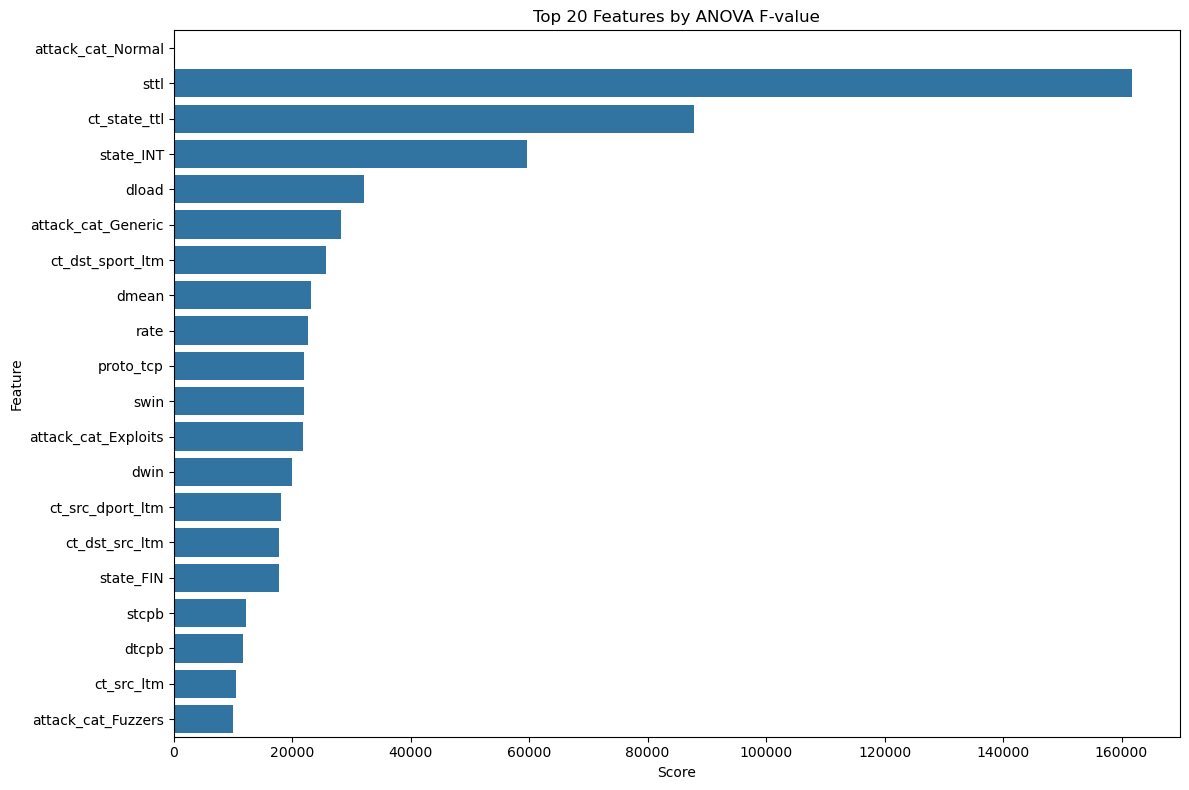

Top 20 features selected by ANOVA F-value:
['rate', 'sttl', 'dload', 'swin', 'stcpb', 'dtcpb', 'dwin', 'dmean', 'ct_state_ttl', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'proto_tcp', 'state_FIN', 'state_INT', 'attack_cat_Exploits', 'attack_cat_Fuzzers', 'attack_cat_Generic', 'attack_cat_Normal']


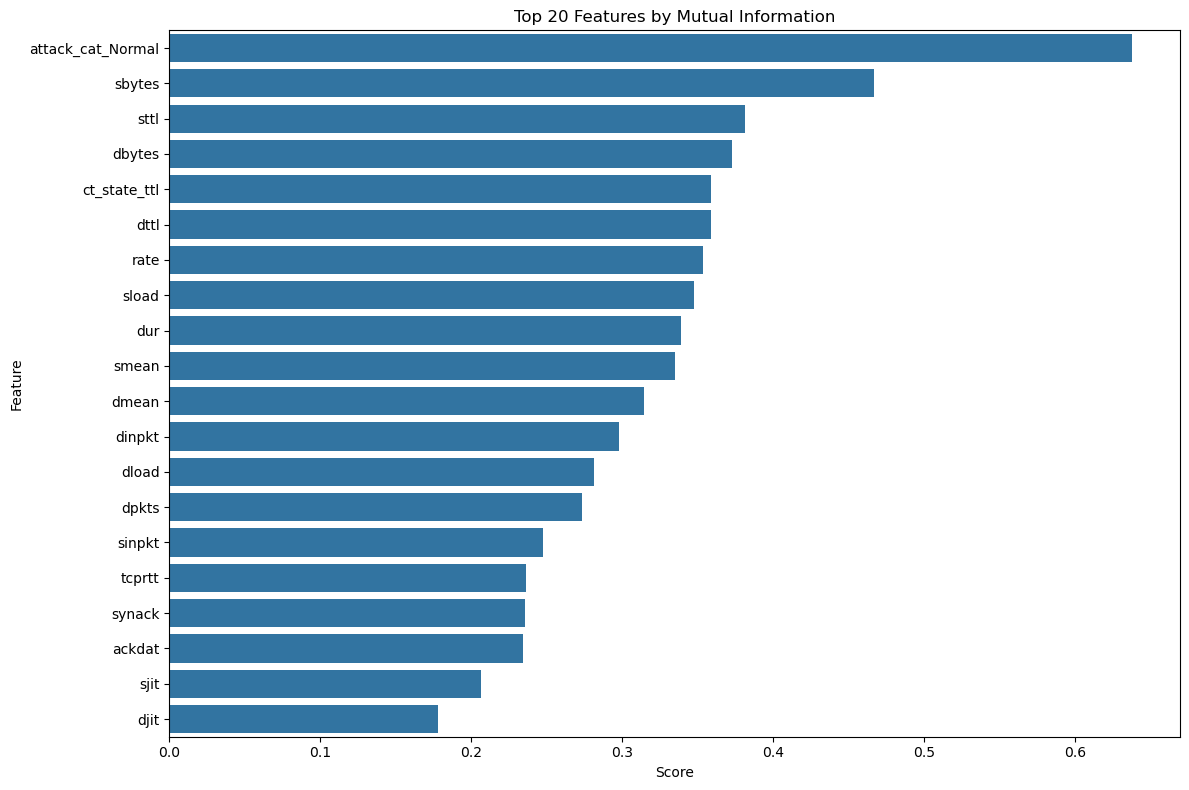

Top 20 features selected by Mutual Information:
['dur', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'ct_state_ttl', 'attack_cat_Normal']
Data contains negative values. Transforming for chi2 test...


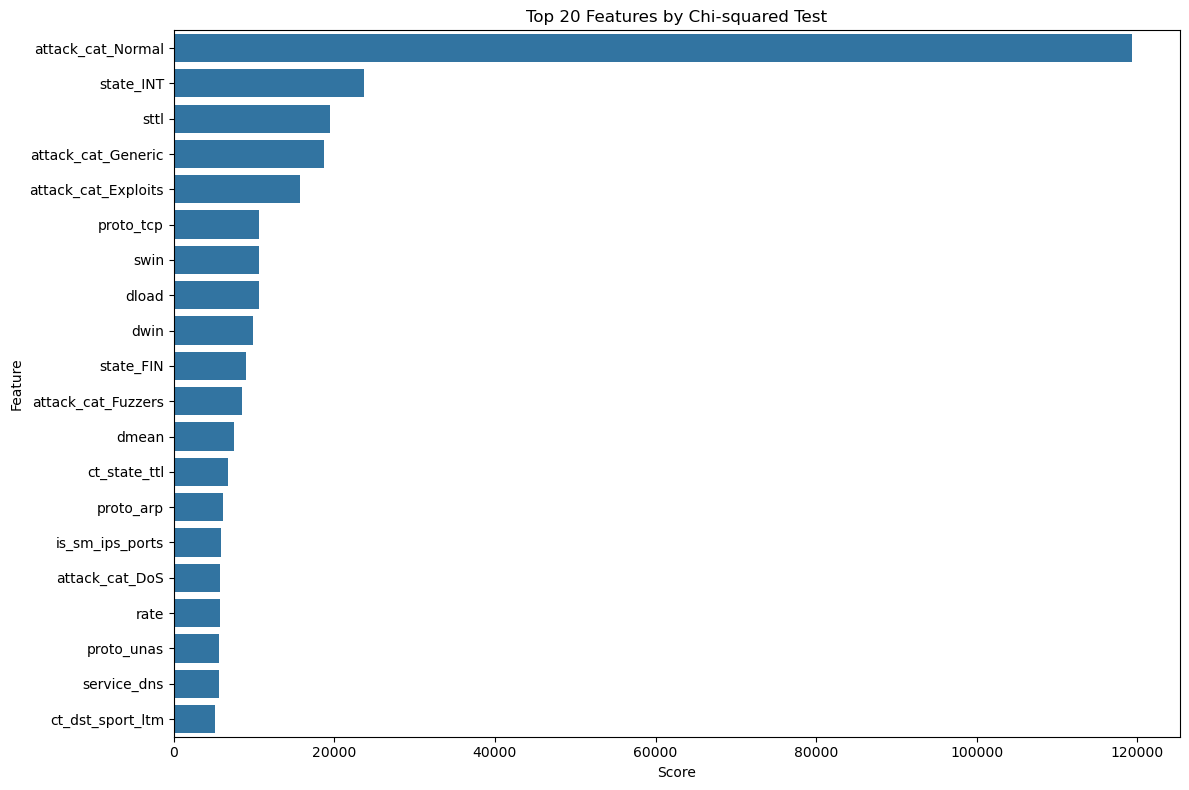

Top 20 features selected by Chi-squared Test:
['rate', 'sttl', 'dload', 'swin', 'dwin', 'dmean', 'ct_state_ttl', 'ct_dst_sport_ltm', 'is_sm_ips_ports', 'proto_arp', 'proto_tcp', 'proto_unas', 'service_dns', 'state_FIN', 'state_INT', 'attack_cat_DoS', 'attack_cat_Exploits', 'attack_cat_Fuzzers', 'attack_cat_Generic', 'attack_cat_Normal']


In [58]:
X_for_selection = df_scaled.drop(['id', 'label'], axis=1)
y = df_scaled['label']
k = 20 

# 1. ANOVA F-value Feature Selection
# Using np.errstate to suppress the divide by zero warning
with np.errstate(divide='ignore', invalid='ignore'):
    selector_f = SelectKBest(score_func=f_classif, k=k)
    X_kbest_f = selector_f.fit_transform(X_for_selection, y)

# Get selected feature names
selected_indices_f = selector_f.get_support(indices=True)
selected_features_f = X_for_selection.columns[selected_indices_f]

# Visualize f_classif scores
f_scores = pd.DataFrame({
    'Feature': X_for_selection.columns,
    'Score': selector_f.scores_
})
f_scores = f_scores.sort_values('Score', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=f_scores.head(20))
plt.title('Top 20 Features by ANOVA F-value')
plt.tight_layout()
plt.show()
print("Top 20 features selected by ANOVA F-value:")
print(selected_features_f.tolist())

# 2. Mutual Information Feature Selection
selector_mi = SelectKBest(score_func=mutual_info_classif, k=k)
X_kbest_mi = selector_mi.fit_transform(X_for_selection, y)

# Get selected feature names
selected_indices_mi = selector_mi.get_support(indices=True)
selected_features_mi = X_for_selection.columns[selected_indices_mi]

# Visualize mutual information scores
mi_scores = pd.DataFrame({
    'Feature': X_for_selection.columns,
    'Score': selector_mi.scores_
})
mi_scores = mi_scores.sort_values('Score', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=mi_scores.head(20))
plt.title('Top 20 Features by Mutual Information')
plt.tight_layout()
plt.show()
print("Top 20 features selected by Mutual Information:")
print(selected_features_mi.tolist())

# 3. Chi-squared Feature Selection (requires non-negative features)
# Check if we need to transform our data first
if X_for_selection.min().min() < 0:
    print("Data contains negative values. Transforming for chi2 test...")
    # Simple min-max scaling to make all values non-negative
    mm_scaler = MinMaxScaler()
    X_scaled_nonneg = pd.DataFrame(mm_scaler.fit_transform(X_for_selection), columns=X_for_selection.columns)
    
    selector_chi2 = SelectKBest(score_func=chi2, k=k)
    X_kbest_chi2 = selector_chi2.fit_transform(X_scaled_nonneg, y)
    
    # Get selected feature names
    selected_indices_chi2 = selector_chi2.get_support(indices=True)
    selected_features_chi2 = X_for_selection.columns[selected_indices_chi2]
    
    # Visualize chi2 scores
    chi2_scores = pd.DataFrame({
        'Feature': X_for_selection.columns,
        'Score': selector_chi2.scores_
    })
    chi2_scores = chi2_scores.sort_values('Score', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Score', y='Feature', data=chi2_scores.head(20))
    plt.title('Top 20 Features by Chi-squared Test')
    plt.tight_layout()
    plt.show()
else:
    selector_chi2 = SelectKBest(score_func=chi2, k=k)
    X_kbest_chi2 = selector_chi2.fit_transform(X_for_selection, y)
    
    # Get selected feature names
    selected_indices_chi2 = selector_chi2.get_support(indices=True)
    selected_features_chi2 = X_for_selection.columns[selected_indices_chi2]
    
    # Visualize chi2 scores
    chi2_scores = pd.DataFrame({
        'Feature': X_for_selection.columns,
        'Score': selector_chi2.scores_
    })
    chi2_scores = chi2_scores.sort_values('Score', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Score', y='Feature', data=chi2_scores.head(20))
    plt.title('Top 20 Features by Chi-squared Test')
    plt.tight_layout()
    plt.show()
print("Top 20 features selected by Chi-squared Test:")
print(selected_features_chi2.tolist())

In [62]:
!pip install matplotlib-venn


     ---------------------------------------- 0.0/40.8 kB ? eta -:--:--
     ------------------- ------------------ 20.5/40.8 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 40.8/40.8 kB 392.1 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45404 sha256=e4b832c5dac0abb640a666b78136607ce6408c92af773c27465a545415910a5c
  Stored in directory: c:\users\gouri\appdata\local\pip\cache\wheels\c2\47\0c\f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib-venn



Number of common features selected by all three methods: 6
Common features:
['sttl', 'rate', 'dload', 'attack_cat_Normal', 'ct_state_ttl', 'dmean']


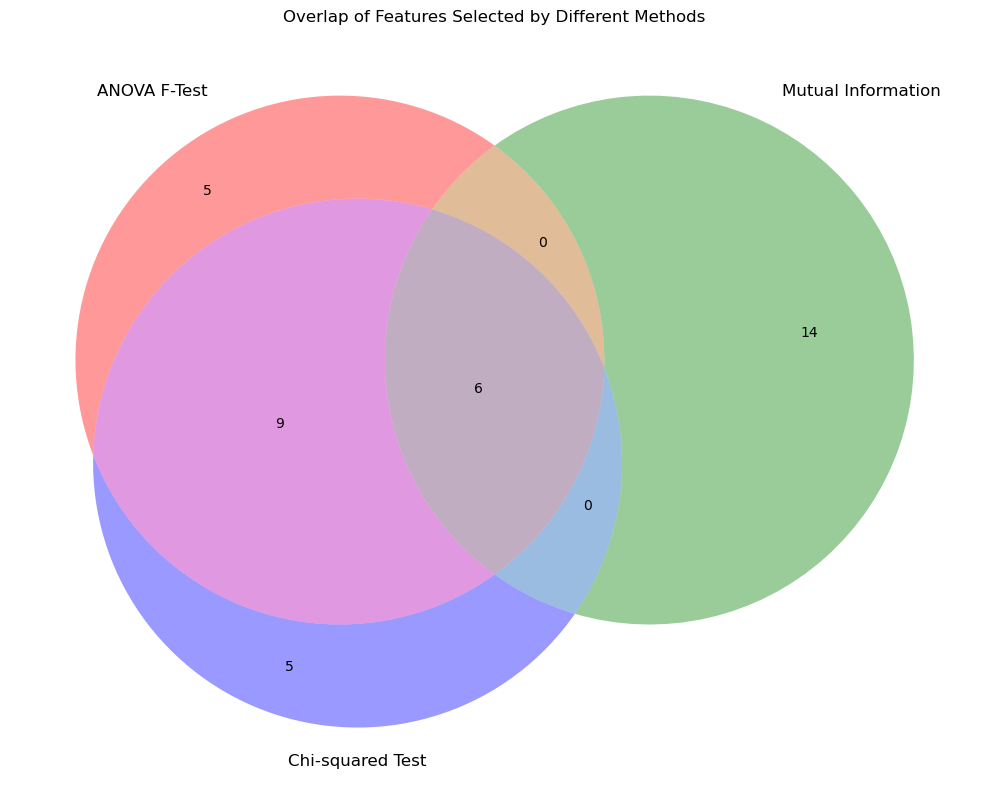

In [64]:
# Find common features selected by all three methods
common_features = set(selected_features_f) & set(selected_features_mi) & set(selected_features_chi2)
print(f"\nNumber of common features selected by all three methods: {len(common_features)}")
print("Common features:")
print(list(common_features))

# Create sets for Venn diagram visualization
from matplotlib_venn import venn3

# Create a Venn diagram to visualize feature overlap
plt.figure(figsize=(10, 10))
venn3([set(selected_features_f), set(selected_features_mi), set(selected_features_chi2)], 
      ('ANOVA F-Test', 'Mutual Information', 'Chi-squared Test'))
plt.title('Overlap of Features Selected by Different Methods')
plt.tight_layout()
plt.show()

In [68]:
X = X_for_selection[selected_features_f]
print(f"Final dataset shape after SelectKBest feature selection: {X.shape}")
print(f"Features selected: {selected_features_f.tolist()}")

Final dataset shape after SelectKBest feature selection: (175341, 20)
Features selected: ['rate', 'sttl', 'dload', 'swin', 'stcpb', 'dtcpb', 'dwin', 'dmean', 'ct_state_ttl', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'proto_tcp', 'state_FIN', 'state_INT', 'attack_cat_Exploits', 'attack_cat_Fuzzers', 'attack_cat_Generic', 'attack_cat_Normal']


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (131505, 20)
Testing set shape: (43836, 20)
